**NAME:** SOMTO A.
<br>**ID:** 801215537
<br>**HW#:** 0
<br>**GITHUB:** *https://github.com/Somto-Dera/ECGR5090-Machine-Learning*

##  PROBLEM 2:  <br>
            This time, run linear regression with gradient descent algorithm using all three explanatory variables. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (theta to zero). Finally discuss your results.

### Problem 1 Pseudocode:  
<br>-import necessary libraries
<br>-load D3.csv dataset 
<br>-create a cost function
<br>-create gradient descent function
<br>-call gradient descent function to get values for theta and cost history in relation to the explanatory variables
<br>-plot a convergence of gradient descent graph with cost history. 
<br>-plot a graph showing the effect of changing the learning rate in convergence of the gradient descent with cost history.
<br>-test result with specific values for variables of x.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------

**-FIRST step is to import the necessary libraries**
<br><br> >*numpy* is used for array and matrics manipulation.
<br> >*pandas* is used for data manipulation and analysis.
<br> >*matplotlib* is used for data visualisation

In [28]:
#import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>

**-SECOND step, load dataset D3.csv into variable 'dataset'**
<br><br> >This dataset was provided by this HW. It contains 4 columns, the first 3 columns are explanatory variables x1, x2, x3; and the final/fourth column is the dependent variable y. It has 100 training examples per column.

In [29]:
dataset = pd.read_csv('D3.csv')
dataset.head() # To get first n rows from the dataset default value of n is 5

,x1,x2,x3,y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [30]:
X = dataset.values[:, 0:3]  # get input values from first column
y = dataset.values[:, 3]  # get output values from second column
m = len(y) # Number of training examples

Text(0.5, 1.0, 'SCATTER PLOT OF TRAINING DATA\nred is x1 | yellow is x2 | blue is x3')

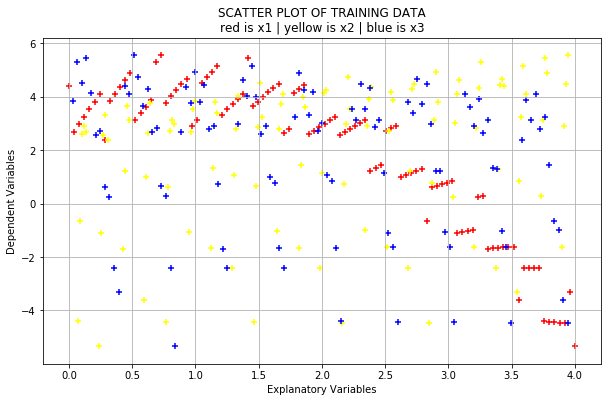

In [31]:
plt.scatter(dataset.values[:, 0],y, color='red',marker= '+')
plt.scatter(dataset.values[:, 1],y, color='yellow',marker= '+')
plt.scatter(dataset.values[:, 2],y, color='blue',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Explanatory Variables')
plt.ylabel('Dependent Variables')
plt.title('SCATTER PLOT OF TRAINING DATA\nred is x1 | yellow is x2 | blue is x3')

<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>

**-THIRD step, create a cost function**
<br><br> >The hypotheis function is h(θ,x)= θ_0 + θ_1 * x_1
<br> >Matrix operations are much faster than loops operations, so matrice of x, θ and (x * θ) were used
<br>

In [32]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)
x = np.hstack((np.ones((m,1)), X))

**Explanation of *compute-cost* function for linear regression**.
<br>**Input Parameters**
<br> *'X' :* 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
<br> *'m' :* number of training examples
<br> *'n' :* number of features (including X_0 column of ones)
<br> *'y' :* 1D array of labels/target value for each traing example. dimension(1 x m)
<br> *'theta' :* 1D array of fitting parameters or weights. Dimension (1 x n)
<br><br>**Output Parameters**
<br> *'J' :* Scalar value.
<br><br>**Library Functions Used**
<br> *numpy.dot()* returns the product of two arrays.
<br> *numpy.subtract()* performs vector entree subtraction
<br> *numpy.square()* performs the vector entree square

In [33]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    #J = 1 / (2 * m) * np.sum(sqrErrors)
    J = 1 / (2 * m) * errors.T.dot(errors)
    
    return J

<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>

**-FOURTH step, create a *gradient_descent* function**
<br><br> > Uses for loop to compute theta using batch gradient descent algorithm.
<br> > Each value theta value is used to compute cost.Result is stored in a list.
<br> > Cost should decrease with every iteration.
<br> > Returns new theta and cost history variable

**Explanation of *gradient_descent* function for linear regression**.
<br>**Input Parameters**
<br> *'X' :* 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
<br> *'m' :* number of training examples
<br> *'n' :* number of features (including X_0 column of ones)
<br> *'y' :* 1D array of labels/target value for each traing example. dimension(1 x m)
<br> *'theta' :* 1D array of fitting parameters or weights. Dimension (1 x n)
<br> *'alpha' :* Learning rate. Scalar value
<br> *'theta' :* 1D array of fitting parameters or weights. Dimension (1 x n)
<br> *'iterations':* No of iterations. Scalar value. 
<br><br>**Output Parameters**
<br> *'theta' :*  Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
<br> *'cost_history' :* Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)

<br><br>**Library Functions Used**
<br> *numpy.dot()* returns the product of two arrays
<br> *numpy.subtract()* performs vector entree subtraction
<br> *numpy.transpose()* reverse or permute the axes of an array


In [34]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history

In [35]:
#Initialise theta to zero as recommended by the hw question
theta = np.zeros(4)

# declare and assign values to the gradient descent learning parameters alpha and no of iterations
#iterations = 800;
#alpha = 0.04;
iterations =1000;
alpha = 0.04;

theta

array([0., 0., 0., 0.])

##### QUESTION 1

<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>

**-FIFTH step, call *gradient_descent* function for x input values**
<br><br> > *gradient_descent* function returns optimal theta and cost history.
<br> > values are printed to screen

In [36]:
mainTheta, cost_history = gradient_descent(x, y, theta, alpha, iterations)
print('Final value of theta =', mainTheta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

Final value of theta = [ 5.21863739 -1.99022411  0.54834904 -0.25159914]
First 5 values from cost_history = [4.51455638 4.13668881 3.89647561 3.69896902 3.52454515]
Last 5 values from cost_history = [0.73896615 0.73896216 0.73895819 0.73895426 0.73895036]


<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>

**-SIXTH step, plot the *Convergence of Gradient Descent*.**
<br><br> > The gradient descent function returns the optimal value of theta
<br> > Plot the values of cost against no of iterations to visualize the performance of the Gradient Descent Algorithm
<br> > Plot
<br> > 
<br> > 

##### QUESTION 2

Text(0.5, 1.0, 'Convergence of gradient descent')

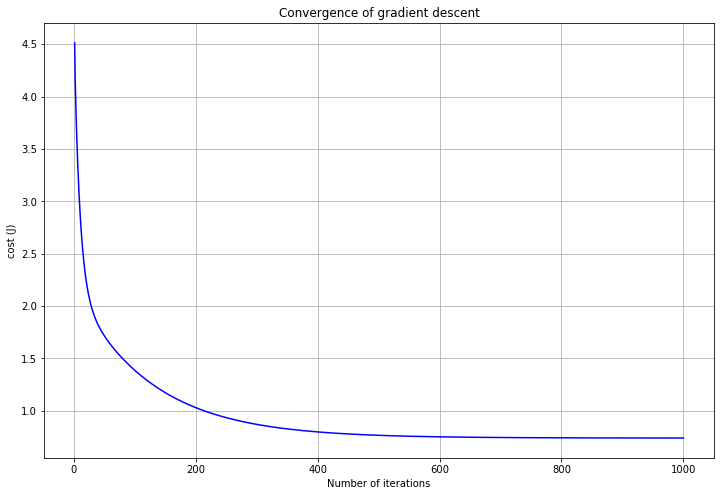

In [37]:
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

##### QUESTION 3

**-SEVENTH STEP, plot the graph showing the effect of learning rate on the Convergence of gradient descent**
<br><br>
<br>

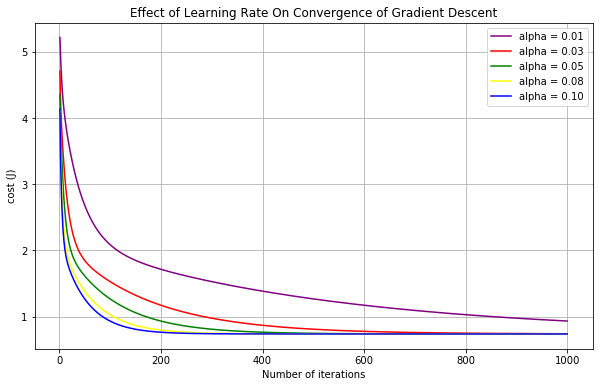

In [38]:
iterations = 1000;
theta = np.zeros(4)

alpha = 0.01;
theta_1, cost_history_1 = gradient_descent(x, y, theta, alpha, iterations)

alpha = 0.03;
theta_2, cost_history_2 = gradient_descent(x, y, theta, alpha, iterations)

alpha = 0.05;
theta_3, cost_history_3 = gradient_descent(x, y, theta, alpha, iterations)

alpha = 0.08;
theta_4, cost_history_4 = gradient_descent(x, y, theta, alpha, iterations)

alpha = 0.10;
theta_5, cost_history_5 = gradient_descent(x, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'alpha = 0.01')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'alpha = 0.03')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'alpha = 0.05')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'alpha = 0.08')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'alpha = 0.10')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()


##### QUESTION 4

**-EIGHTH STEP, test the prediction capabilities of the model**
<br><br> Checking the predict values using the theta value gotten from the gradient descent algorithm and specific x values.
<br> 

In [39]:
predictTest1 = np.array([1, 1, 1, 1]).dot(mainTheta)
print("Using theta derived from the gradient decent function, we can predict for 'x' variable of x = [1, 1, 1], our prediction of y is ", predictTest1)

Using theta derived from the gradient decent function, we can predict for 'x' variable of x = [1, 1, 1], our prediction of y is  3.5251631845177074


In [40]:

predictTest2 = np.array([1, 2, 0, 4]).dot(mainTheta)
print("Using theta derived from the gradient decent function, we can predict for specific 'x' variable of x = [2, 0, 4], our prediction of y is ", predictTest2)

Using theta derived from the gradient decent function, we can predict for specific 'x' variable of x = [2, 0, 4], our prediction of y is  0.23179261410386265


In [41]:
predictTest3 = np.array([1, 3, 2, 1]).dot(mainTheta)
print("Using theta derived from the gradient decent function, we can predict for specific 'x' variable of x = [3, 2, 1], our prediction of y is ", predictTest3)

Using theta derived from the gradient decent function, we can predict for specific 'x' variable of x = [3, 2, 1], our prediction of y is  0.09306401330394026


<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>

## OBSERVATIONS
<br>

<br><br>For the experiment i had a fixed number of iterations(1000). i noticed  that with the increase of the learning rate, the steeper the curve in Convergence graph and the higher the learning rate the shallower the curve. 

